Premier perceptron / neurone
(basé sur les tutoriels vidéos de Machine Learnia)

On s'intéresse ici à un jeu de données à 2 entrées (x1, x2) et une validation en tout ou rien (0 ou 1)

## Bibliothèques

In [24]:
# Perceptron Simple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Fonctions du neurone

### Initialisation

Les paramètres du neurone sont initialisés à des valeurs aléatoires

In [2]:
# initialisation des paramètres W et b
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    # W = vecteur de même taille de X (ici 2 - coordonnées x,y des points)
    b = np.random.randn(1)
    return (W, b)

### Modèle

On définit ici l'évolution du modèle selon une loi linéaire : Z = w1 * x1 + w2 * x2 + b

Une fonction d'activation de type sigmoide est ensuite calculée.

In [3]:
# modele - fonction sigmoide
def model(X, W, b):
    # modele matriciel
    Z = X.dot(W) + b
    # activation
    A = 1 / (1 + np.exp(-Z))
    return A

### Fonction de coût

Fonction permettant de quantifier les erreurs commises par le modèle

In [4]:
def log_loss(A, y):
    # Attention probleme d'overflow de la fonction exp du modèle qui entraine des A valant 0 ou 1.
    # Or dans la fonction log_loss, log(0) est non défini !!
    # on insère un epsilon faible volontairement
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

### Descente de gradients

In [5]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

### Mise à jour des paramètres

In [6]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### Prediction

Prédiction d'un ensemble de données vis-à-vis du modèle

In [7]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)    # probabilite d'etre dans la classe
    return A >= 0.5

## Mise en place d'un neurone

Algorithme de calcul des paramètres du modèle sur un certain nombre d'itération (epoch)

Affichage des courbes du coût et de précision/exactitude

In [8]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100, pas_iter = 10):
    # initialisation W, b
    W, b = initialisation(X)
    # Evolution du cout / taux d'erreur de l'apprentissage
    Loss = []
    # Evolution du taux d'erreur
    acc = []

    # boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        # activations
        A = model(X, W, b)
        if i % pas_iter == 0:
            # Calcul cout
            Loss.append(log_loss(A, y))
            # Calcul taux d'erreur
            y_pred = predict(X, W, b)
            acc.append(accuracy_score(y, y_pred))
        # Calcul des gradients
        dW, db = gradients(A, X, y)
        # Mise à jour
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    # Comparaison donnees réelles y et données prédites par le modèle
    print(accuracy_score(y, y_pred))

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Loss)
    plt.subplot(1,2,2)
    plt.plot(acc)
    plt.show()

    return (W, b)   # retourne les paramètres du modèle

Version avec affichage du coût et de l'exactitude pour des données de test

In [9]:
# Definition du neuronne artificiel
def artificial_neuron_test(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100, pas_iter = 10):
    # initialisation W, b
    W, b = initialisation(X_train)
    # Evolution du cout / taux d'erreur de l'apprentissage
    Loss_train = []
    Loss_test = []
    # Evolution du taux d'erreur
    acc_train = []
    acc_test = []

    # boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        # activations
        A = model(X_train, W, b)
        if i % pas_iter == 0:
            # Train data
            # Calcul cout
            Loss_train.append(log_loss(A, y_train))
            # Calcul taux d'erreur
            y_pred = predict(X_train, W, b)
            acc_train.append(accuracy_score(y_train, y_pred))

            # Test data - pour vérifier l'efficacité du modèle
            A_test = model(X_test, W, b)
            # Calcul cout
            Loss_test.append(log_loss(A_test, y_test))
            # Calcul taux d'erreur
            y_pred = predict(X_test, W, b)
            acc_test.append(accuracy_score(y_test, y_pred))

        # Calcul des gradients
        dW, db = gradients(A, X_train, y_train)
        # Mise à jour
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X_train, W, b)
    # Comparaison donnees réelles y et données prédites par le modèle
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Loss_train, label='train loss')
    plt.plot(Loss_test, label='test loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(acc_train, label='train acc')
    plt.plot(acc_test, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)   # retourne les paramètres du modèle

## Essai 1

### Set de données / Entrainement et test

In [10]:
# 2 Sets de variables X et Y de 100 échantillons de 2 grandeurs chacun
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=23)
y = y.reshape((y.shape[0], 1))

X_test, y_test = make_blobs(n_samples=100, n_features=2, centers=2, random_state=23)
y_test = y_test.reshape((y_test.shape[0], 1))

### Affichage des informations des sets de données

dimensions de X: (1000, 2)
dimensions de y: (1000, 1)


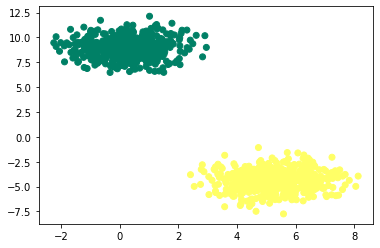

In [11]:
# affichage des informations des vecteurs x et y
print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)
# affichage des échantillons X
plt.figure()
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

### Entrainement du neurone

100%|██████████| 100/100 [00:00<00:00, 2029.78it/s]


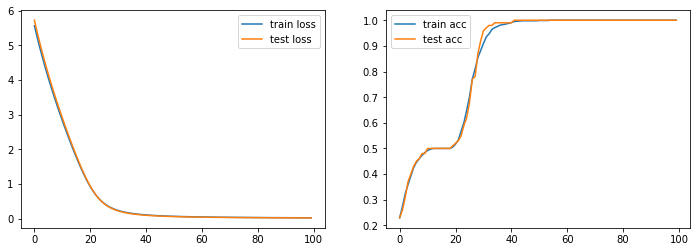

In [12]:
# Premier essai
W, b = artificial_neuron_test(X, y, X_test, y_test, learning_rate = 0.01, n_iter = 100, pas_iter = 1)

### Prédiction sur 2 nouvelles données

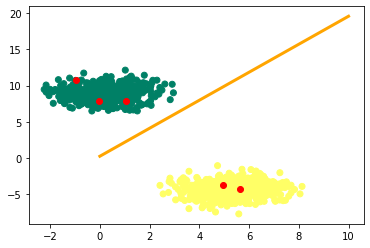

Predictions : [[False]
 [ True]
 [False]
 [False]
 [ True]]
Vraies Vals : [0 1 0 0 1]


In [13]:
# Prediction sur de nouvelles données
X_valid, y_valid = make_blobs(n_samples=5, n_features=2, centers=2, random_state=23)

# affichage des échantillons X et de la nouvelle donnée
plt.figure()
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(X_valid[:,0], X_valid[:,1], c='r')
# affichage courbe de décision
x1 = np.linspace(0, 10, 100)
x2 = ( - W[0] * x1 - b) / W[1]
plt.plot(x1, x2, c='orange', lw=3)
plt.show()

# Prediction sur nouvel échantillon
print("Predictions : " + str(predict(X_valid, W, b)))
print("Vraies Vals : " + str(y_valid))

## Essai 2

dimensions de X: (1000, 2)
dimensions de y: (1000, 1)


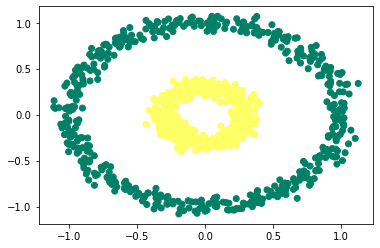

In [14]:
# Data set
# 2 Sets de variables X et Y de 100 échantillons de 2 grandeurs chacun
X2, y2 = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
y2 = y2.reshape((y2.shape[0], 1))

X2_test, y2_test = make_circles(n_samples=100, factor=0.3, noise=0.05, random_state=0)
y2_test = y2_test.reshape((y2_test.shape[0], 1))

# affichage des informations des vecteurs x et y
print('dimensions de X:', X2.shape)
print('dimensions de y:', y2.shape)
# affichage des échantillons X
plt.figure()
plt.scatter(X2[:,0], X2[:, 1], c=y2, cmap='summer')
plt.show()

100%|██████████| 100/100 [00:00<00:00, 2030.84it/s]


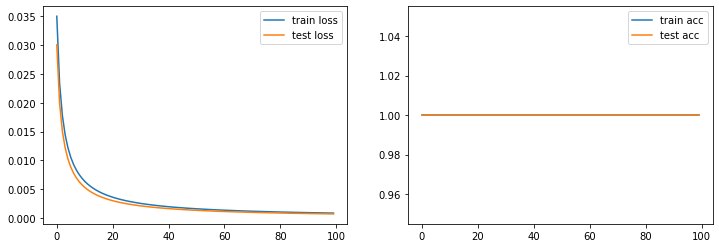

In [15]:
# Entrainement
W2, b2 = artificial_neuron_test(X, y, X_test, y_test, learning_rate = 0.3, n_iter = 100, pas_iter = 1)

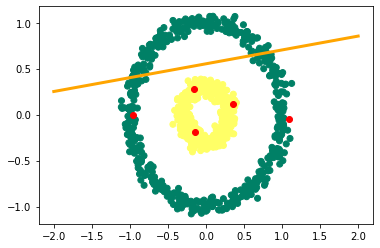

Predictions : [[ True]
 [ True]
 [ True]
 [ True]
 [ True]]
Vraies Vals : [1 0 0 1 1]


In [16]:
# Prediction sur de nouvelles données
X2_valid, y2_valid = make_circles(n_samples=5, factor=0.3, noise=0.05, random_state=0)

# affichage des échantillons X et de la nouvelle donnée
plt.figure()
plt.scatter(X2[:,0], X2[:, 1], c=y2, cmap='summer')
plt.scatter(X2_valid[:,0], X2_valid[:,1], c='r')
# affichage courbe de décision
x1 = np.linspace(-2, 2, 10)
x2 = ( - W2[0] * x1 - b2) / W2[1]
plt.plot(x1, x2, c='orange', lw=3)
plt.show()

# Prediction sur nouvel échantillon
print("Predictions : " + str(predict(X2_valid, W2, b2)))
print("Vraies Vals : " + str(y2_valid))

## Essai 3

### Chargement des données / images

In [17]:
import h5py
def load_data():
    train_dataset = h5py.File('trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

### Affichage des premières images

dimensions de X: (1000, 64, 64)
dimensions de y: (1000, 1)
1000


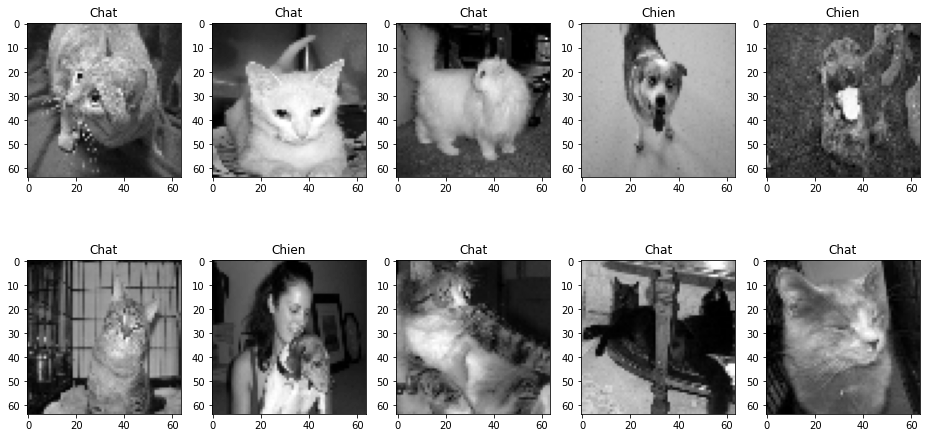

In [18]:
print('dimensions de X:', X_train.shape)
print('dimensions de y:', y_train.shape)
print(len(X_train))

# Affichage des premières images
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    if y_train[i] == 1:
        plt.title('Chien')
    else:
        plt.title('Chat')
plt.show()

### Préparation des données

In [19]:
# Préparation des données
# 1 - normalisation (0-255 --> 0 - 1)
# Utilisation Normalisation MinMax - pour chaque pixel
# p = p - pmin / (pmax - pmin)
max_train = X_train.max()
X_train = X_train / max_train
X_test = X_test / max_train     # Attention l'entrainement est fait avec le max de X_train
# 2 - passage de 64x64 à 4096*1
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train_reshape.max())

# Attention ! Si réseau faisant des pas d'apprentissage, possibilité d'oscillation dans la fonction de cout...
# Réduire le taux d'apprentissage...

1.0


### Entrainement du modèle

100%|██████████| 10000/10000 [00:03<00:00, 2668.52it/s]


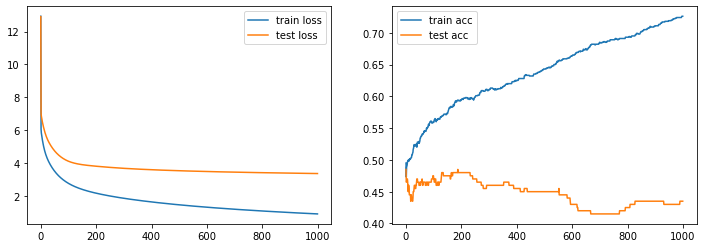

In [20]:
WB, bB = artificial_neuron_test(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10000, pas_iter=10)